<a href="https://colab.research.google.com/github/MuskanSinhaPi/Intern/blob/main/Clubbed_Categories_of_SF_Crime_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install google.colab
from google.colab import drive
import pandas as pd

#mounting drive
drive.mount('/content/drive')
# reading data
sf_crime=pd.read_csv("/content/drive/MyDrive/internship/Datasets/San Francisco Crime/SFCrime.csv")

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 6.2 MB/s eta 0:00:00
Mounted at /content/drive


<ipython-input-1-8b48e36a179a>:8: DtypeWarning: Columns (0,29) have mixed types. Specify dtype option on import or set low_memory=False.
  sf_crime=pd.read_csv("/content/drive/MyDrive/internship/Datasets/San Francisco Crime/SFCrime.csv")


###Feature Engineering

In [ ]:
sf_crime = sf_crime[['Category', 'Descript', 'DayOfWeek', 'Date', 'Time', 'PdDistrict','Resolution', 'Address', 'X','Y']]

#Data Cleaning

# Drop rows with any missing values
sf_crime.dropna(inplace=True)
print(sf_crime.isnull().sum())

Category      0
Descript      0
DayOfWeek     0
Date          0
Time          0
PdDistrict    0
Resolution    0
Address       0
X             0
Y             0
dtype: int64


In [ ]:
# Convert 'Date' and 'Time' columns to datetime because we can only use .dt accessor with datetimelike values
sf_crime['datetime'] = pd.to_datetime(sf_crime['Date'] + ' ' + sf_crime['Time'])

# Extract relevant features
sf_crime['year'] = sf_crime['datetime'].dt.year
sf_crime['hour'] = sf_crime['datetime'].dt.hour
sf_crime['month'] = sf_crime['datetime'].dt.month
sf_crime['day_of_week'] = sf_crime['datetime'].dt.dayofweek
sf_crime['day'] = pd.to_datetime(sf_crime['datetime']).dt.day
sf_crime['minute'] = pd.to_datetime(sf_crime['datetime']).dt.minute

In [ ]:
print(sf_crime.columns)

Index(['Category', 'Descript', 'DayOfWeek', 'Date', 'Time', 'PdDistrict',
       'Resolution', 'Address', 'X', 'Y', 'datetime', 'year', 'hour', 'month',
       'day_of_week', 'day', 'minute'],
      dtype='object')


In [ ]:
# Filter data for years before 2018 for training and use 2018 for testing
train_df = sf_crime[sf_crime['year'] < 2018]
test_df = sf_crime[sf_crime['year'] == 2018]

In [ ]:
train_df.shape

(1192663, 17)

In [ ]:
test_df.shape

(738, 17)

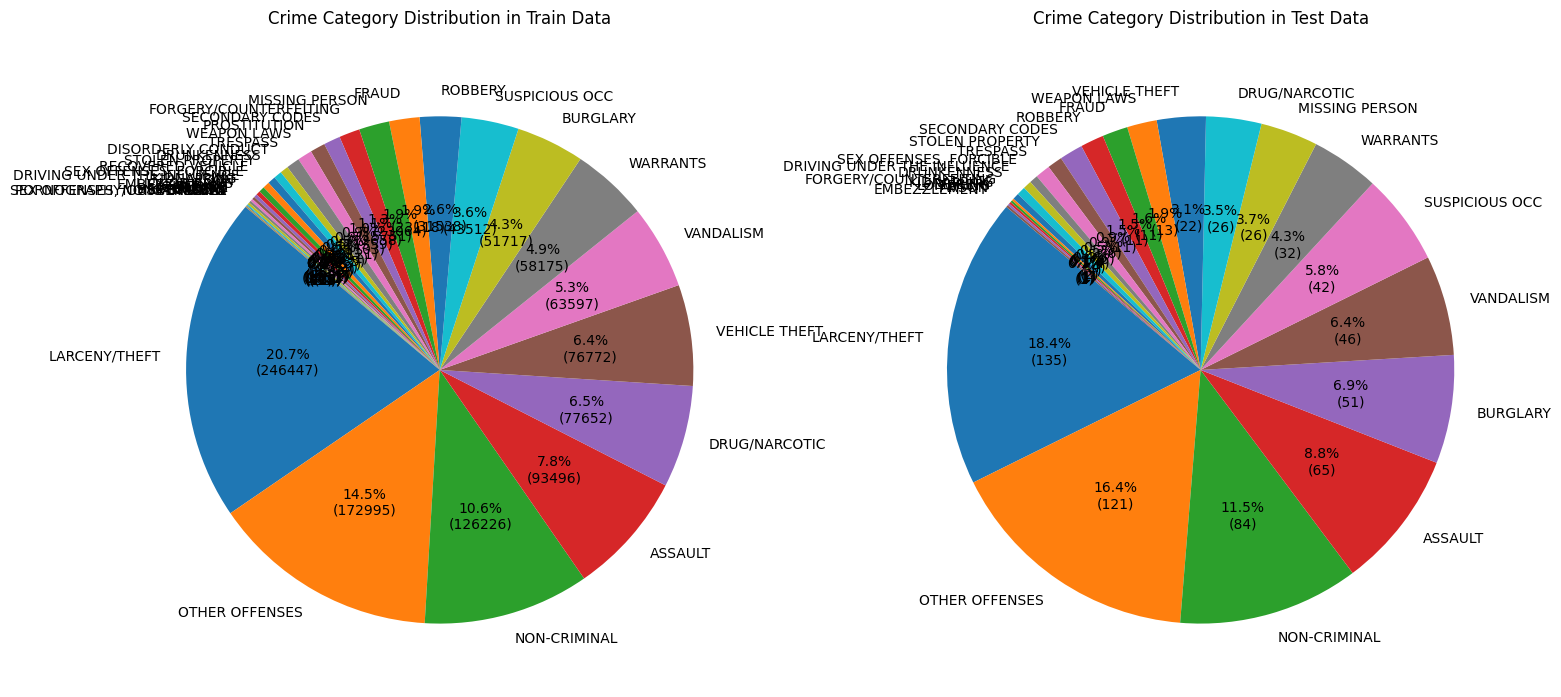

In [ ]:
import matplotlib.pyplot as plt

# Assuming train_df and test_df are your dataframes and they have a column 'Category' for crime types

# Calculate the distribution of crime categories in train_df
train_category_counts = train_df['Category'].value_counts()
train_category_labels = train_category_counts.index
train_category_sizes = train_category_counts.values

# Calculate the distribution of crime categories in test_df
test_category_counts = test_df['Category'].value_counts()
test_category_labels = test_category_counts.index
test_category_sizes = test_category_counts.values

# Function to format the labels
def autopct_format(pct, allvals):
    absolute = int(pct/100.*sum(allvals))
    return f"{pct:.1f}%\n({absolute})"

# Plot pie chart for train_df
plt.figure(figsize=(18, 9))

plt.subplot(1, 2, 1)
plt.pie(train_category_sizes, labels=train_category_labels, autopct=lambda pct: autopct_format(pct, train_category_sizes), startangle=140)
plt.title(f'Crime Category Distribution in Train Data\n')

# Plot pie chart for test_df
plt.subplot(1, 2, 2)
plt.pie(test_category_sizes, labels=test_category_labels, autopct=lambda pct: autopct_format(pct, test_category_sizes), startangle=140)
plt.title(f'Crime Category Distribution in Test Data\n')

plt.show()

In [ ]:
print(train_df['Category'].unique())
print()
print("Number of Categories of Crime")
print(len(train_df['Category'].unique()))

['ROBBERY' 'VEHICLE THEFT' 'ARSON' 'ASSAULT' 'TRESPASS' 'BURGLARY'
 'LARCENY/THEFT' 'WARRANTS' 'OTHER OFFENSES' 'DRUG/NARCOTIC'
 'SUSPICIOUS OCC' 'LIQUOR LAWS' 'VANDALISM' 'WEAPON LAWS' 'NON-CRIMINAL'
 'MISSING PERSON' 'FRAUD' 'SEX OFFENSES, FORCIBLE' 'SECONDARY CODES'
 'DISORDERLY CONDUCT' 'RECOVERED VEHICLE' 'KIDNAPPING'
 'FORGERY/COUNTERFEITING' 'PROSTITUTION' 'DRUNKENNESS' 'BAD CHECKS'
 'DRIVING UNDER THE INFLUENCE' 'LOITERING' 'STOLEN PROPERTY' 'SUICIDE'
 'BRIBERY' 'EXTORTION' 'EMBEZZLEMENT' 'GAMBLING' 'PORNOGRAPHY/OBSCENE MAT'
 'SEX OFFENSES, NON FORCIBLE' 'TREA']

Number of Categories of Crime
37


In [ ]:
print(test_df['Category'].unique())
print()
print("Number of Categories of Crime")
print(len(test_df['Category'].unique()))

['LARCENY/THEFT' 'NON-CRIMINAL' 'OTHER OFFENSES' 'VANDALISM'
 'SUSPICIOUS OCC' 'ASSAULT' 'WARRANTS' 'BURGLARY' 'DRUG/NARCOTIC'
 'VEHICLE THEFT' 'MISSING PERSON' 'WEAPON LAWS' 'DRUNKENNESS'
 'SECONDARY CODES' 'SEX OFFENSES, FORCIBLE' 'STOLEN PROPERTY' 'FRAUD'
 'TRESPASS' 'KIDNAPPING' 'DRIVING UNDER THE INFLUENCE' 'ROBBERY' 'BRIBERY'
 'FORGERY/COUNTERFEITING' 'LOITERING' 'ARSON' 'EMBEZZLEMENT']

Number of Categories of Crime
26


In [ ]:
# Create a mapping dictionary for the new categories
category_mapping = {
    'ROBBERY': 'Violent Crimes',
    'VEHICLE THEFT': 'Property Crimes',
    'ARSON': 'Violent Crimes',
    'ASSAULT': 'Violent Crimes',
    'TRESPASS': 'Miscellaneous',
    'BURGLARY': 'Property Crimes',
    'LARCENY/THEFT': 'Property Crimes',
    'WARRANTS': 'Administrative and Other Offenses',
    'OTHER OFFENSES': 'Administrative and Other Offenses',
    'DRUG/NARCOTIC': 'Drug and Alcohol Related',
    'SUSPICIOUS OCC': 'Miscellaneous',
    'LIQUOR LAWS': 'Drug and Alcohol Related',
    'VANDALISM': 'Property Crimes',
    'WEAPON LAWS': 'Violent Crimes',
    'NON-CRIMINAL': 'Non-Criminal and Special Cases',
    'MISSING PERSON': 'Non-Criminal and Special Cases',
    'FRAUD': 'Property Crimes',
    'SEX OFFENSES, FORCIBLE': 'Violent Crimes',
    'SECONDARY CODES': 'Administrative and Other Offenses',
    'DISORDERLY CONDUCT': 'Public Order Crimes',
    'RECOVERED VEHICLE': 'Non-Criminal and Special Cases',
    'KIDNAPPING': 'Violent Crimes',
    'FORGERY/COUNTERFEITING': 'Property Crimes',
    'PROSTITUTION': 'Public Order Crimes',
    'DRUNKENNESS': 'Drug and Alcohol Related',
    'BAD CHECKS': 'White Collar Crimes',
    'DRIVING UNDER THE INFLUENCE': 'Drug and Alcohol Related',
    'LOITERING': 'Public Order Crimes',
    'STOLEN PROPERTY': 'Property Crimes',
    'SUICIDE': 'Non-Criminal and Special Cases',
    'BRIBERY': 'White Collar Crimes',
    'EXTORTION': 'White Collar Crimes',
    'EMBEZZLEMENT': 'Property Crimes',
    'GAMBLING': 'Public Order Crimes',
    'PORNOGRAPHY/OBSCENE MAT': 'Non-Criminal and Special Cases',
    'SEX OFFENSES, NON FORCIBLE': 'Violent Crimes',
    'TREA': 'Non-Criminal and Special Cases'
}

# Replace the original 'Category' column with the new categories
sf_crime['Category'] = sf_crime['Category'].map(category_mapping)
train_df['Category'] = train_df['Category'].map(category_mapping)
test_df['Category'] = test_df['Category'].map(category_mapping)

<ipython-input-11-27c64f4601a1>:44: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_df['Category'] = train_df['Category'].map(category_mapping)
<ipython-input-11-27c64f4601a1>:45: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_df['Category'] = test_df['Category'].map(category_mapping)


In [ ]:
print(train_df['Category'].unique())
print()
print("Number of Categories of Crime in Train Data")
print(len(train_df['Category'].unique()))
print()
print()
print(test_df['Category'].unique())
print()
print("Number of Categories of Crime in Test Data")
print(len(test_df['Category'].unique()))

['Violent Crimes' 'Property Crimes' 'Miscellaneous'
 'Administrative and Other Offenses' 'Drug and Alcohol Related'
 'Non-Criminal and Special Cases' 'Public Order Crimes'
 'White Collar Crimes']

Number of Categories of Crime in Train Data
8


['Property Crimes' 'Non-Criminal and Special Cases'
 'Administrative and Other Offenses' 'Miscellaneous' 'Violent Crimes'
 'Drug and Alcohol Related' 'White Collar Crimes' 'Public Order Crimes']

Number of Categories of Crime in Test Data
8


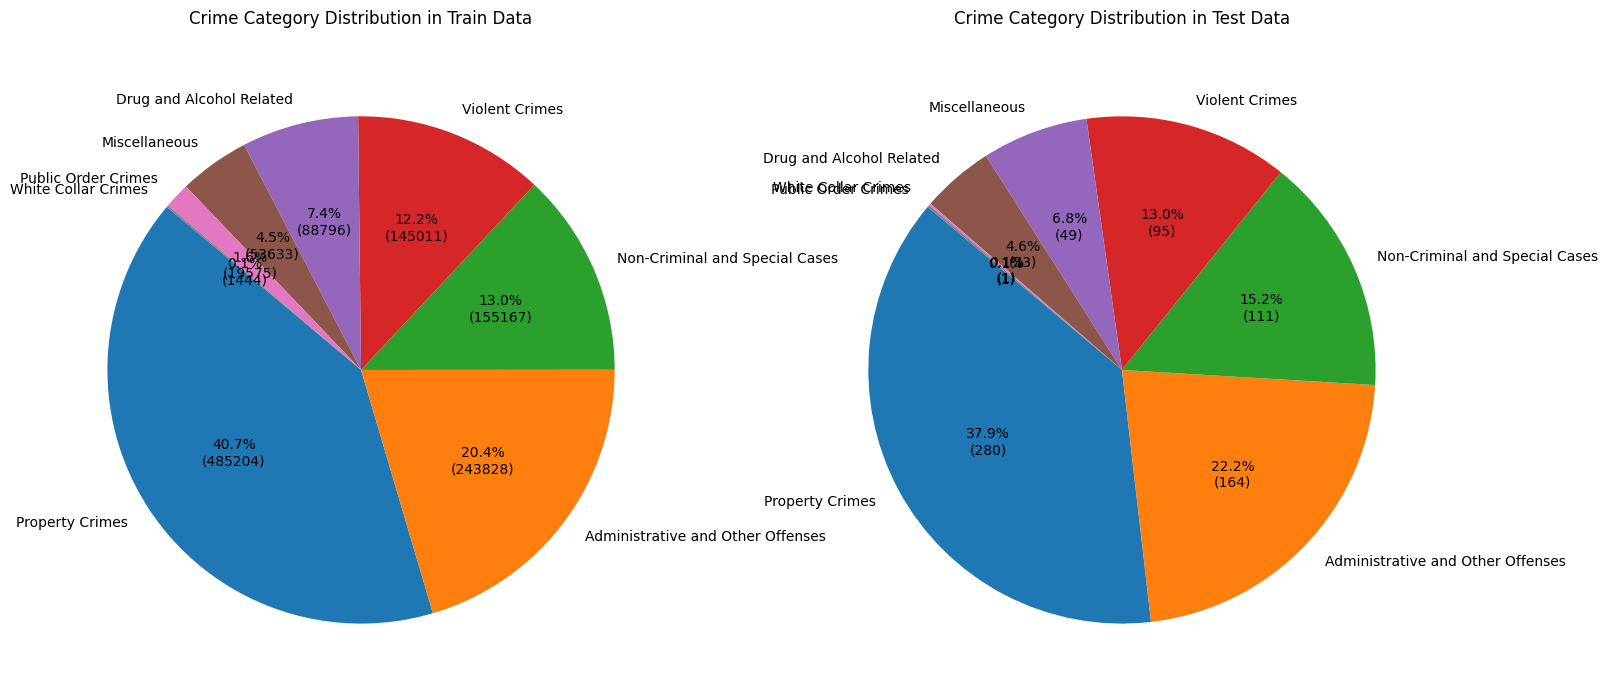

In [ ]:
import matplotlib.pyplot as plt

# Assuming train_df and test_df are your dataframes and they have a column 'Category' for crime types

# Calculate the distribution of crime categories in train_df
train_category_counts = train_df['Category'].value_counts()
train_category_labels = train_category_counts.index
train_category_sizes = train_category_counts.values

# Calculate the distribution of crime categories in test_df
test_category_counts = test_df['Category'].value_counts()
test_category_labels = test_category_counts.index
test_category_sizes = test_category_counts.values

# Function to format the labels
def autopct_format(pct, allvals):
    absolute = int(pct/100.*sum(allvals))
    return f"{pct:.1f}%\n({absolute})"

# Plot pie chart for train_df
plt.figure(figsize=(18, 9))

plt.subplot(1, 2, 1)
plt.pie(train_category_sizes, labels=train_category_labels, autopct=lambda pct: autopct_format(pct, train_category_sizes), startangle=140)
plt.title(f'Crime Category Distribution in Train Data\n')

# Plot pie chart for test_df
plt.subplot(1, 2, 2)
plt.pie(test_category_sizes, labels=test_category_labels, autopct=lambda pct: autopct_format(pct, test_category_sizes), startangle=140)
plt.title(f'Crime Category Distribution in Test Data\n')

plt.show()

##Correlation Heatmap

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

Correlation of features with Category_encoded:
 minute                   0.135951
PdDistrict_TENDERLOIN    0.115247
PdDistrict_CENTRAL       0.057318
PdDistrict_NORTHERN      0.044268
day_of_week              0.029604
PdDistrict_TARAVAL       0.028038
PdDistrict_RICHMOND      0.026735
PdDistrict_BAYVIEW       0.023928
PdDistrict_MISSION       0.019651
month                    0.016919
PdDistrict_INGLESIDE     0.014871
day                      0.012725
year                     0.009652
hour                     0.007916
PdDistrict_SOUTHERN      0.003468
X                        0.002209
Y                        0.002209
PdDistrict_PARK          0.000241
Name: Category_encoded, dtype: float64


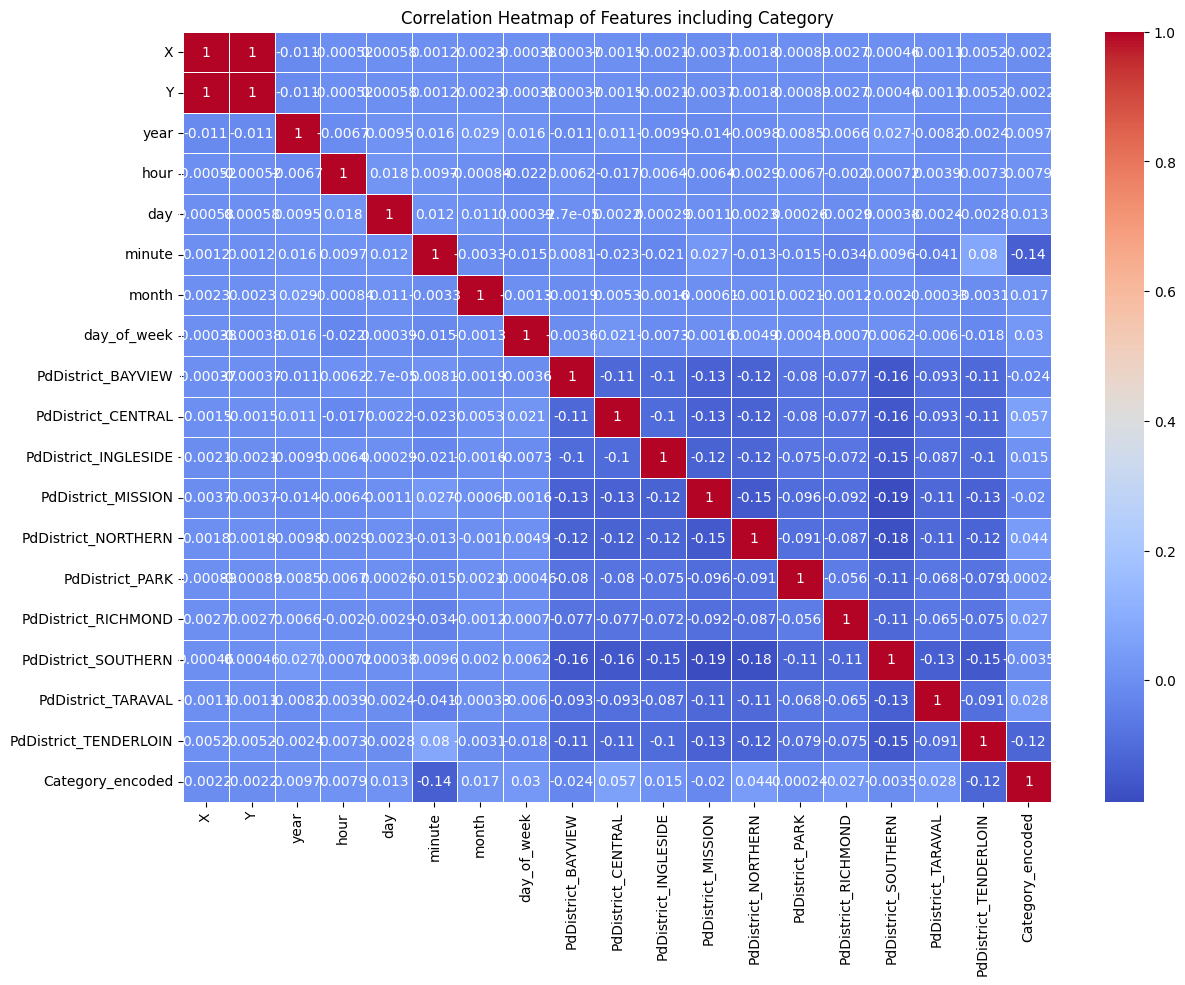

In [ ]:
feature_all=['PdDistrict', 'X', 'Y', 'year', 'hour','day','minute','month','day_of_week']

# Create a dataframe with these features
df_features = sf_crime[feature_all]

# One-hot encode the 'PdDistrict' column
df_features = pd.get_dummies(df_features, columns=['PdDistrict'])

# Convert boolean True/False to 1/0
df_features = df_features.astype(int)

# Check for missing values and handle them if necessary
df_features = df_features.dropna()

# Ensure all features are numeric
assert df_features.applymap(lambda x: isinstance(x, (int, float))).all().all(), "Some features are not numeric."

# Label encode the 'Category' column
label_encoder_category = LabelEncoder()
sf_crime['Category_encoded'] = label_encoder_category.fit_transform(sf_crime['Category'])
# Add 'Category_encoded' to the features
df_features['Category_encoded'] = sf_crime['Category_encoded']

# Compute the correlation matrix
correlation_matrix = df_features.corr()

# Extract the correlation of all features with 'Category_encoded'
category_corr = correlation_matrix['Category_encoded'].drop('Category_encoded')

# Sort correlations by absolute value in descending order
relevant_features = category_corr.abs().sort_values(ascending=False)

print("Correlation of features with Category_encoded:\n", relevant_features)

# Plot the correlation heatmap
plt.figure(figsize=(14, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap of Features including Category')
plt.show()

##Data Preparation

In [ ]:
import numpy as np
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report

In [ ]:
label_encoder = LabelEncoder()

# Encode 'Category' (target variable)
train_df['Category'] = label_encoder.fit_transform(train_df['Category'])
test_df['Category'] = label_encoder.transform(test_df['Category'])

<ipython-input-17-9c2db736ad87>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_df['Category'] = label_encoder.fit_transform(train_df['Category'])
<ipython-input-17-9c2db736ad87>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_df['Category'] = label_encoder.transform(test_df['Category'])


In [ ]:
# Define the features and target variable
features = ['PdDistrict','hour','day','minute','day_of_week', 'month', 'X', 'Y']
X_train = train_df[features]
y_train = train_df['Category']
X_test = test_df[features]
y_test = test_df['Category']

# One-hot encode the 'PdDistrict' feature
X_train = pd.get_dummies(X_train, columns=['PdDistrict'])
X_test = pd.get_dummies(X_test, columns=['PdDistrict'])

# Ensure the columns match between train and test sets
X_train, X_test = X_train.align(X_test, join='left', axis=1, fill_value=0)

In [ ]:
X_train.head()

,hour,day,minute,day_of_week,month,X,Y,PdDistrict_BAYVIEW,PdDistrict_CENTRAL,PdDistrict_INGLESIDE,PdDistrict_MISSION,PdDistrict_NORTHERN,PdDistrict_PARK,PdDistrict_RICHMOND,PdDistrict_SOUTHERN,PdDistrict_TARAVAL,PdDistrict_TENDERLOIN
0,17,22,50,0,11,-122.420084,37.708311,False,False,True,False,False,False,False,False,False,False
1,20,18,0,1,10,-120.500000,90.000000,False,False,False,False,False,True,False,False,False,False
2,2,15,0,6,2,-120.500000,90.000000,False,False,False,False,False,False,False,True,False,False
3,5,18,27,4,2,-122.436220,37.724377,False,False,True,False,False,False,False,False,False,False
4,17,21,0,6,11,-122.410541,37.770913,False,False,False,False,False,False,False,True,False,False


#Model Training - XGBoost

In [ ]:
# Initialize the XGBoost model
model = XGBClassifier(n_estimators=100, max_depth=8, learning_rate=0.6, random_state=42)

# Train the model
model.fit(X_train, y_train)

# Make predictions on the training data
y_train_pred = model.predict(X_train)

# Make predictions on the test data
y_test_pred = model.predict(X_test)

# Calculate the accuracy
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

print(f"XGBoost Training Accuracy: {train_accuracy:.4f}")
print(f"XGBoost Test Accuracy: {test_accuracy:.4f}")

XGBoost Training Accuracy: 0.5455
XGBoost Test Accuracy: 0.4336


In [ ]:
# # Evaluate the model
# accuracy = accuracy_score(y_test, y_test_pred)
# precision = precision_score(y_test, y_test_pred, average='weighted')
# recall = recall_score(y_test, y_test_pred, average='weighted')
# f1 = f1_score(y_test, y_test_pred, average='weighted')

# print(f'Accuracy: {accuracy:.2f}')
# print(f'Precision: {precision:.2f}')
# print(f'Recall: {recall:.2f}')
# print(f'F1 Score: {f1:.2f}')

# Generate classification report
report = classification_report(y_test, y_test_pred)
print(report)
# # Print detailed classification report
# print(classification_report(y_test, y_pred, target_names=label_encoder.classes_, labels=label_encoder.transform(label_encoder.classes_)))

              precision    recall  f1-score   support

           0       0.32      0.48      0.38       164
           1       0.06      0.03      0.04        34
           2       0.00      0.00      0.00        50
           3       0.50      0.16      0.24       112
           4       0.53      0.78      0.63       280
           5       0.00      0.00      0.00         1
           6       0.17      0.05      0.08        96
           7       0.00      0.00      0.00         1

    accuracy                           0.43       738
   macro avg       0.20      0.19      0.17       738
weighted avg       0.37      0.43      0.37       738



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


##RandomForest

In [ ]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

# Example: Trying a RandomForest
rf_model = RandomForestClassifier(n_estimators=150, max_depth=15, random_state=42)
rf_model.fit(X_train, y_train)

# Predictions on training data
y_train_pred = rf_model.predict(X_train)
# Predictions on test data
y_test_pred = rf_model.predict(X_test)

# Compute accuracy
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

print(f"Random Forest Training Accuracy: {train_accuracy:.4f}")
print(f"Random Forest Test Accuracy: {test_accuracy:.4f}")

report = classification_report(y_test, y_test_pred)
print(report)

Random Forest Training Accuracy: 0.5111
Random Forest Test Accuracy: 0.4268
              precision    recall  f1-score   support

           0       0.33      0.48      0.39       164
           1       0.15      0.06      0.09        34
           2       0.00      0.00      0.00        50
           3       0.67      0.02      0.03       112
           4       0.48      0.83      0.61       280
           5       0.00      0.00      0.00         1
           6       0.00      0.00      0.00        96
           7       0.00      0.00      0.00         1

    accuracy                           0.43       738
   macro avg       0.20      0.17      0.14       738
weighted avg       0.37      0.43      0.33       738



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


##Training a Neural Network

In [ ]:
from sklearn import preprocessing as prepro
from keras.layers import Dense, Dropout, BatchNormalization
from keras.utils import to_categorical
from keras.models import Sequential
from keras.optimizers import Adam
from collections import Counter
from sklearn.preprocessing import StandardScaler
from keras.utils import to_categorical
import tensorflow as tf
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [ ]:
# Convert y to categorical (assuming y is numeric)
y_train_categorical = to_categorical(y_train)
y_test_categorical = to_categorical(y_test)

# Preprocessing and Standardize X_train and X_test
X_train = prepro.StandardScaler().fit_transform(X_train)
X_test = prepro.StandardScaler().fit_transform(X_test)

# Convert y_train to a NumPy array of floating-point values
y_train_float = y_train.astype(np.float32)

# Convert y_train to a Tensor
y_train_tensor = tf.convert_to_tensor(y_train_float)

Epoch 1/8
18636/18636 [==============================] - 61s 3ms/step - loss: 1.5217 - accuracy: 0.4347 - val_loss: 1.6246 - val_accuracy: 0.3835
Epoch 2/8
18636/18636 [==============================] - 53s 3ms/step - loss: 1.4804 - accuracy: 0.4509 - val_loss: 2.7537 - val_accuracy: 0.3306
Epoch 3/8
18636/18636 [==============================] - 53s 3ms/step - loss: 1.4704 - accuracy: 0.4539 - val_loss: 2.4346 - val_accuracy: 0.3455
Epoch 4/8
18636/18636 [==============================] - 58s 3ms/step - loss: 1.4643 - accuracy: 0.4562 - val_loss: 2.7938 - val_accuracy: 0.3415
Epoch 5/8
18636/18636 [==============================] - 53s 3ms/step - loss: 1.4607 - accuracy: 0.4573 - val_loss: 3.7199 - val_accuracy: 0.3686
Epoch 6/8
18636/18636 [==============================] - 55s 3ms/step - loss: 1.4589 - accuracy: 0.4585 - val_loss: 2.7322 - val_accuracy: 0.3862
Epoch 7/8
18636/18636 [==============================] - 52s 3ms/step - loss: 1.4572 - accuracy: 0.4591 - val_loss: 2.8253 -

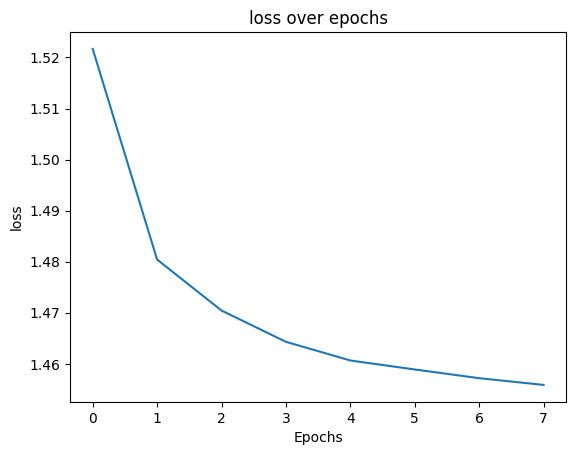

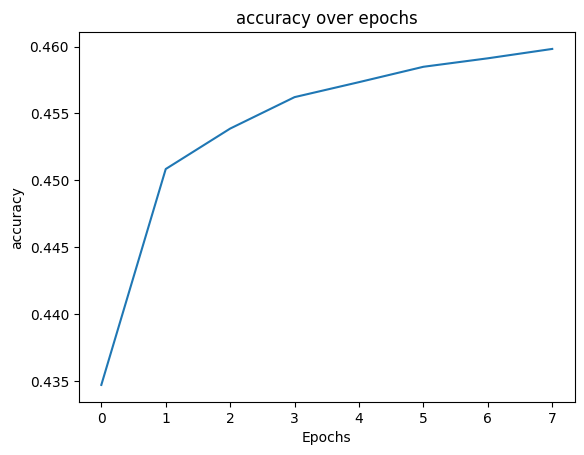

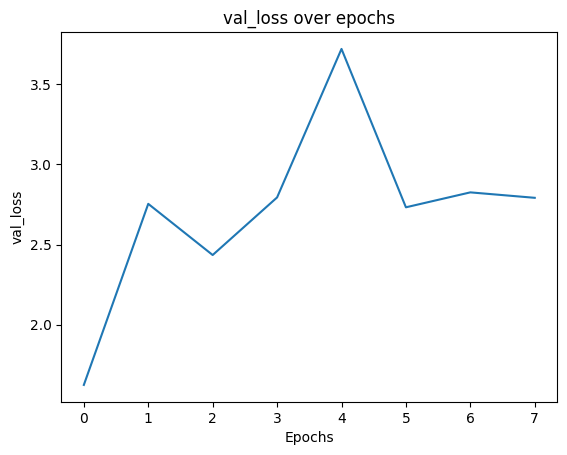

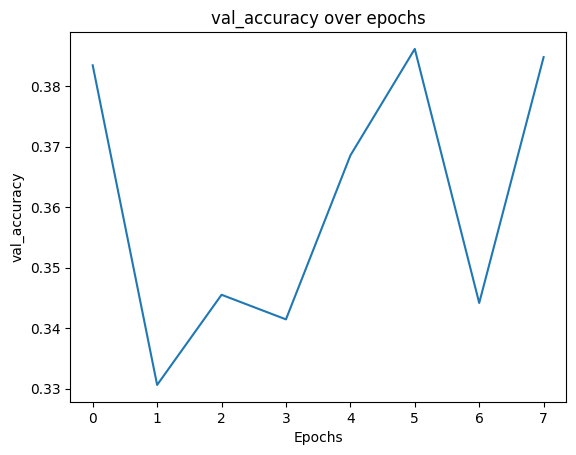

In [ ]:
model = Sequential()

model.add(Dense(128, activation='relu', input_shape=(X_train.shape[1],)))
model.add(BatchNormalization())
model.add(Dropout(0.1))

model.add(Dense(64, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.1))

model.add(Dense(y_train_categorical.shape[1], activation='softmax'))

# Compile the model
model.compile(metrics=['accuracy'], loss='categorical_crossentropy', optimizer='adam')

# Ensure that y_train_categorical and y_test_categorical are numpy arrays
y_train_categorical = to_categorical(y_train)
y_test_categorical = to_categorical(y_test)

# Convert y_train to a Tensor
y_train_tensor = tf.convert_to_tensor(y_train_categorical)

# Train the model
history = model.fit(X_train, y_train_tensor, validation_data=(X_test, y_test_categorical), batch_size=64, epochs=8)

for j in list(history.history.keys()):
    plt.plot(history.history[j])
    plt.title(j + ' over epochs')
    plt.ylabel(j)
    plt.xlabel('Epochs')
    plt.show()

24/24 [==============================] - 0s 1ms/step


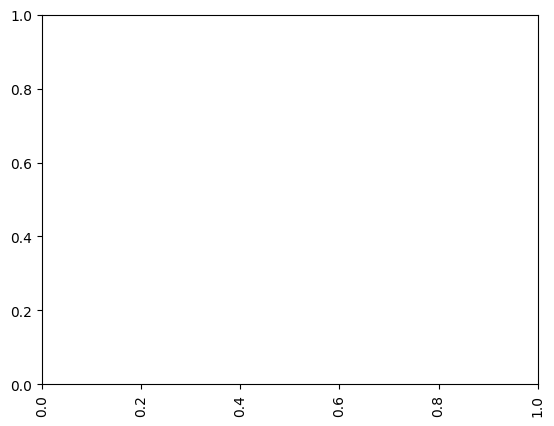

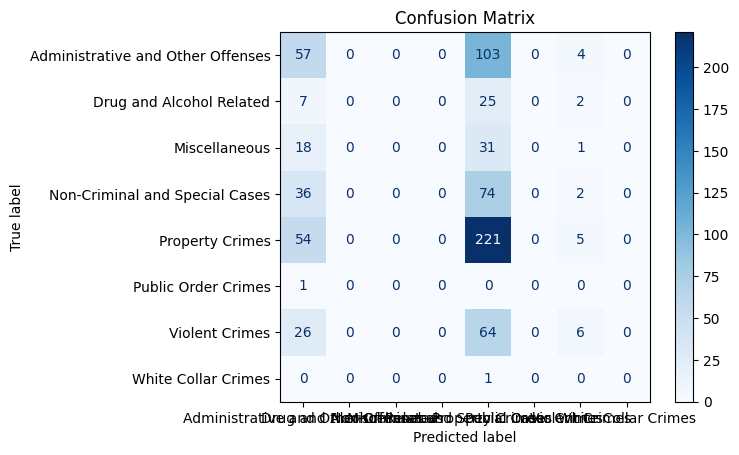

In [ ]:
# Make predictions
y_pred_prob = model.predict(X_test)
y_pred = np.argmax(y_pred_prob, axis=1)
y_true = np.argmax(y_test_categorical, axis=1)

# Generate confusion matrix
conf_matrix = confusion_matrix(y_true, y_pred)

# Retrieve original class names from LabelEncoder
class_labels = label_encoder.classes_

# Plot confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=class_labels)
plt.xticks(rotation=90)
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.show()

In [ ]:
report = classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.29      0.35      0.31       164
           1       0.00      0.00      0.00        34
           2       0.00      0.00      0.00        50
           3       0.00      0.00      0.00       112
           4       0.43      0.79      0.55       280
           5       0.00      0.00      0.00         1
           6       0.30      0.06      0.10        96
           7       0.00      0.00      0.00         1

    accuracy                           0.38       738
   macro avg       0.13      0.15      0.12       738
weighted avg       0.26      0.38      0.29       738



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


##Simpler NN Architecture

Epoch 1/8
18636/18636 [==============================] - 40s 2ms/step - loss: 1.5380 - accuracy: 0.4264 - val_loss: 1.5969 - val_accuracy: 0.4051
Epoch 2/8
18636/18636 [==============================] - 41s 2ms/step - loss: 1.5127 - accuracy: 0.4352 - val_loss: 1.8388 - val_accuracy: 0.3604
Epoch 3/8
18636/18636 [==============================] - 39s 2ms/step - loss: 1.5076 - accuracy: 0.4386 - val_loss: 1.8581 - val_accuracy: 0.3482
Epoch 4/8
18636/18636 [==============================] - 37s 2ms/step - loss: 1.5026 - accuracy: 0.4405 - val_loss: 1.9982 - val_accuracy: 0.3455
Epoch 5/8
18636/18636 [==============================] - 41s 2ms/step - loss: 1.5011 - accuracy: 0.4413 - val_loss: 1.8501 - val_accuracy: 0.3523
Epoch 6/8
18636/18636 [==============================] - 40s 2ms/step - loss: 1.4999 - accuracy: 0.4420 - val_loss: 1.8618 - val_accuracy: 0.3604
Epoch 7/8
18636/18636 [==============================] - 39s 2ms/step - loss: 1.4993 - accuracy: 0.4423 - val_loss: 1.8756 -

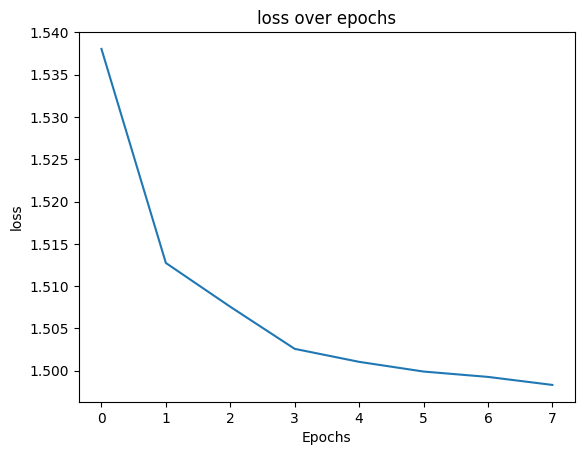

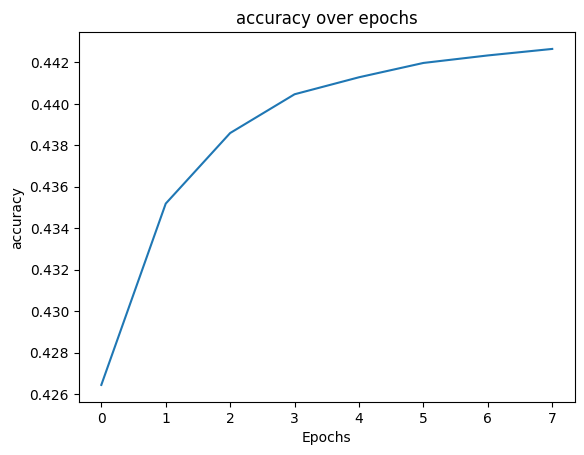

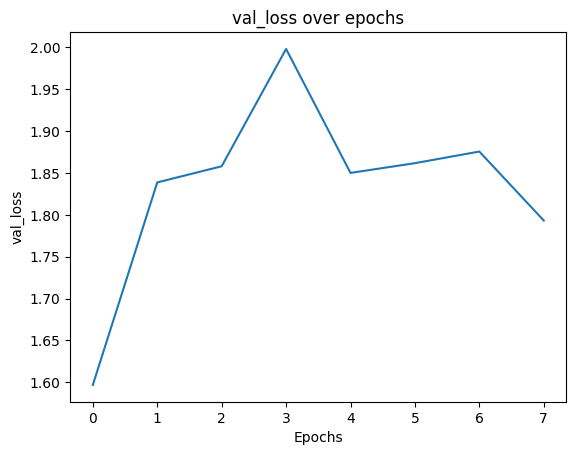

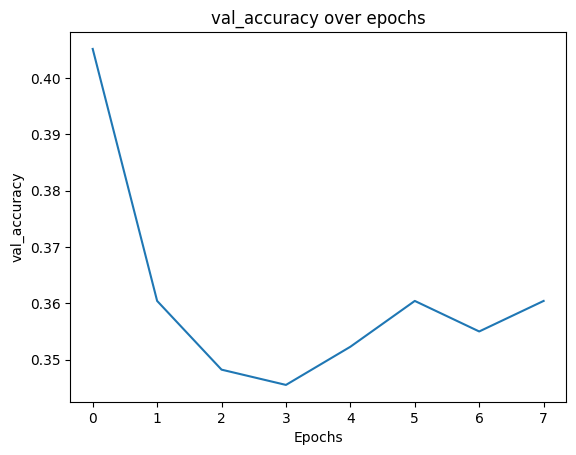

In [ ]:
model = Sequential()

model.add(Dense(32, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.1))

model.add(Dense(y_train_categorical.shape[1], activation='softmax'))

# Compile the model
model.compile(metrics=['accuracy'], loss='categorical_crossentropy', optimizer='adam')

# Ensure that y_train_categorical and y_test_categorical are numpy arrays
y_train_categorical = to_categorical(y_train)
y_test_categorical = to_categorical(y_test)

# Convert y_train to a Tensor
y_train_tensor = tf.convert_to_tensor(y_train_categorical)

# Train the model
history = model.fit(X_train, y_train_tensor, validation_data=(X_test, y_test_categorical), batch_size=64, epochs=8) #steps_per_epoch=2195

for j in list(history.history.keys()):
    plt.plot(history.history[j])
    plt.title(j + ' over epochs')
    plt.ylabel(j)
    plt.xlabel('Epochs')
    plt.show()

24/24 [==============================] - 0s 1ms/step


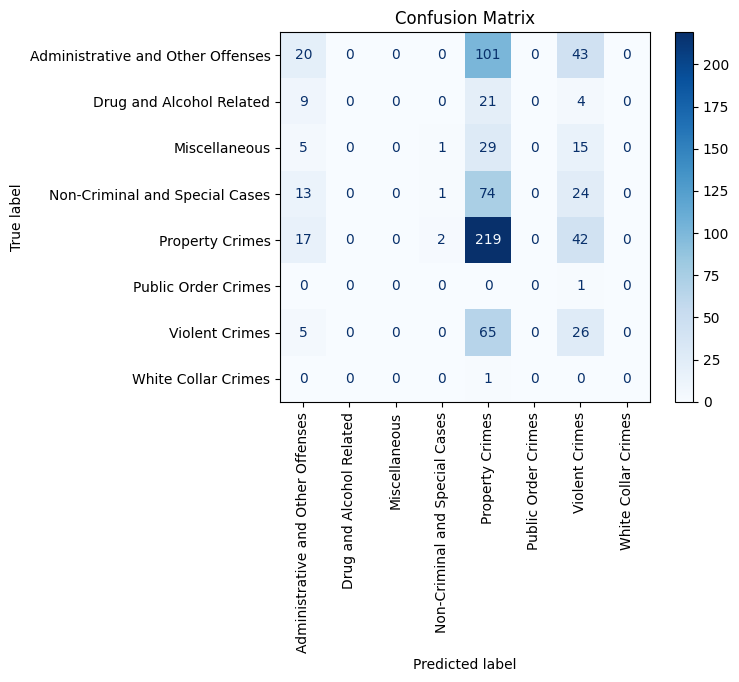

In [ ]:
# Make predictions
y_pred_prob = model.predict(X_test)
y_pred = np.argmax(y_pred_prob, axis=1)
y_true = np.argmax(y_test_categorical, axis=1)

# Generate confusion matrix
conf_matrix = confusion_matrix(y_true, y_pred)

# Retrieve original class names from LabelEncoder
class_labels = label_encoder.classes_

# Plot confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=class_labels)
disp.plot(cmap=plt.cm.Blues)
plt.xticks(rotation=90)
plt.title('Confusion Matrix')
plt.show()

In [ ]:
report = classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.29      0.12      0.17       164
           1       0.00      0.00      0.00        34
           2       0.00      0.00      0.00        50
           3       0.25      0.01      0.02       112
           4       0.43      0.78      0.55       280
           5       0.00      0.00      0.00         1
           6       0.17      0.27      0.21        96
           7       0.00      0.00      0.00         1

    accuracy                           0.36       738
   macro avg       0.14      0.15      0.12       738
weighted avg       0.29      0.36      0.28       738



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


##Transforming Time into Cyclic Representations

###XGBoost

<ipython-input-33-813132f363e1>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['hour_sin'] = np.sin(2 * np.pi * df['hour'] / 24)
<ipython-input-33-813132f363e1>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['hour_cos'] = np.cos(2 * np.pi * df['hour'] / 24)
<ipython-input-33-813132f363e1>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.

Accuracy: 0.4092140921409214


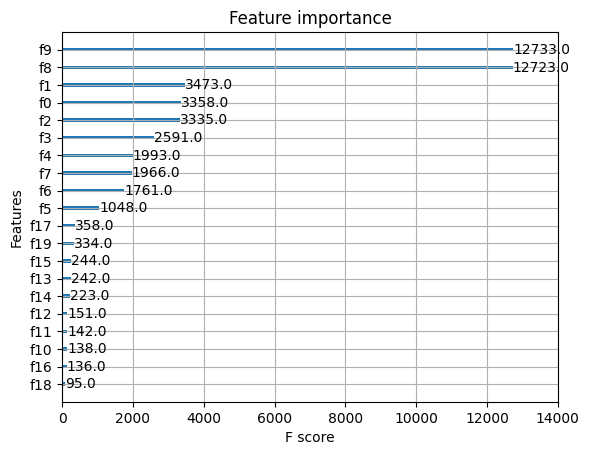

In [ ]:
# Define a function to transform time features into cyclic representations
def transform_cyclic_features(df):
    df['hour_sin'] = np.sin(2 * np.pi * df['hour'] / 24)
    df['hour_cos'] = np.cos(2 * np.pi * df['hour'] / 24)
    df['day_sin'] = np.sin(2 * np.pi * df['day'] / 31)  # Assuming day of month ranges from 1 to 31
    df['day_cos'] = np.cos(2 * np.pi * df['day'] / 31)
    df['day_of_week_sin'] = np.sin(2 * np.pi * df['day_of_week'] / 7)
    df['day_of_week_cos'] = np.cos(2 * np.pi * df['day_of_week'] / 7)
    df['month_sin'] = np.sin(2 * np.pi * df['month'] / 12)
    df['month_cos'] = np.cos(2 * np.pi * df['month'] / 12)
    return df

# Apply the transformation to both training and test datasets
train_df = transform_cyclic_features(train_df)
test_df = transform_cyclic_features(test_df)

# Select features and labels
features = ['PdDistrict', 'hour_sin', 'hour_cos', 'day_sin', 'day_cos', 'day_of_week_sin', 'day_of_week_cos', 'month_sin', 'month_cos', 'X', 'Y']
X_train = train_df[features]
y_train = train_df['Category']
X_test = test_df[features]
y_test = test_df['Category']

# Convert categorical features to numeric using one-hot encoding
X_train = pd.get_dummies(X_train)
X_test = pd.get_dummies(X_test)

# Ensure both train and test sets have the same dummy variables
X_train, X_test = X_train.align(X_test, join='left', axis=1, fill_value=0)

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Define the XGBoost model
model = xgb.XGBClassifier(objective='multi:softprob', num_class=39, eval_metric='mlogloss', use_label_encoder=False)

# Train the model
model.fit(X_train_scaled, y_train)

# Predict on the test set
y_pred = model.predict(X_test_scaled)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

# Plotting feature importances
xgb.plot_importance(model)
plt.show()

In [ ]:
report = classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.32      0.21      0.25       164
           1       0.09      0.06      0.07        34
           2       0.00      0.00      0.00        50
           3       0.56      0.12      0.20       112
           4       0.44      0.89      0.59       280
           5       0.00      0.00      0.00         1
           6       0.33      0.01      0.02        96
           7       0.00      0.00      0.00         1

    accuracy                           0.41       738
   macro avg       0.22      0.16      0.14       738
weighted avg       0.37      0.41      0.32       738



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


##Neural Network

In [ ]:
# Define a function to transform time features into cyclic representations
def transform_cyclic_features(df):
    df['hour_sin'] = np.sin(2 * np.pi * df['hour'] / 24)
    df['hour_cos'] = np.cos(2 * np.pi * df['hour'] / 24)
    df['day_sin'] = np.sin(2 * np.pi * df['day'] / 31)  # Assuming day of month ranges from 1 to 31
    df['day_cos'] = np.cos(2 * np.pi * df['day'] / 31)
    df['day_of_week_sin'] = np.sin(2 * np.pi * df['day_of_week'] / 7)
    df['day_of_week_cos'] = np.cos(2 * np.pi * df['day_of_week'] / 7)
    df['month_sin'] = np.sin(2 * np.pi * df['month'] / 12)
    df['month_cos'] = np.cos(2 * np.pi * df['month'] / 12)
    return df

# Apply the transformation to both training and test datasets
train_df = transform_cyclic_features(train_df)
test_df = transform_cyclic_features(test_df)

# Select features and labels
features = ['PdDistrict', 'hour_sin', 'hour_cos', 'day_sin', 'day_cos', 'day_of_week_sin', 'day_of_week_cos', 'month_sin', 'month_cos', 'X', 'Y']
X_train = train_df[features]
y_train = train_df['Category']
X_test = test_df[features]
y_test = test_df['Category']

# Convert categorical features to numeric using one-hot encoding
X_train = pd.get_dummies(X_train)
X_test = pd.get_dummies(X_test)

# Ensure both train and test sets have the same dummy variables
X_train, X_test = X_train.align(X_test, join='left', axis=1, fill_value=0)

<ipython-input-35-f2a4fde4e23c>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['hour_sin'] = np.sin(2 * np.pi * df['hour'] / 24)
<ipython-input-35-f2a4fde4e23c>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['hour_cos'] = np.cos(2 * np.pi * df['hour'] / 24)
<ipython-input-35-f2a4fde4e23c>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.

In [ ]:
# Convert y to categorical (assuming y is numeric)
y_train_categorical = to_categorical(y_train)
y_test_categorical = to_categorical(y_test)

# Preprocessing and Standardize X_train and X_test
X_train = prepro.StandardScaler().fit_transform(X_train)
X_test = prepro.StandardScaler().fit_transform(X_test)

# Convert y_train to a NumPy array of floating-point values
y_train_float = y_train.astype(np.float32)

# Convert y_train to a Tensor
y_train_tensor = tf.convert_to_tensor(y_train_float)

Epoch 1/10
74542/74542 [==============================] - 155s 2ms/step - loss: 1.5685 - accuracy: 0.4150 - val_loss: 2.0040 - val_accuracy: 0.3767
Epoch 2/10
74542/74542 [==============================] - 150s 2ms/step - loss: 1.5540 - accuracy: 0.4196 - val_loss: 2.7958 - val_accuracy: 0.3320
Epoch 3/10
74542/74542 [==============================] - 153s 2ms/step - loss: 1.5512 - accuracy: 0.4205 - val_loss: 2.9764 - val_accuracy: 0.3333
Epoch 4/10
74542/74542 [==============================] - 149s 2ms/step - loss: 1.5500 - accuracy: 0.4206 - val_loss: 2.8494 - val_accuracy: 0.3347
Epoch 5/10
74542/74542 [==============================] - 148s 2ms/step - loss: 1.5492 - accuracy: 0.4209 - val_loss: 3.5732 - val_accuracy: 0.3320
Epoch 6/10
74542/74542 [==============================] - 153s 2ms/step - loss: 1.5488 - accuracy: 0.4211 - val_loss: 3.7517 - val_accuracy: 0.3279
Epoch 7/10
74542/74542 [==============================] - 148s 2ms/step - loss: 1.5476 - accuracy: 0.4218 - val_

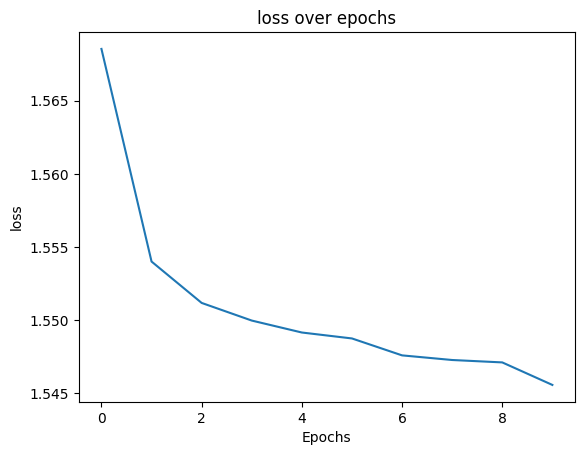

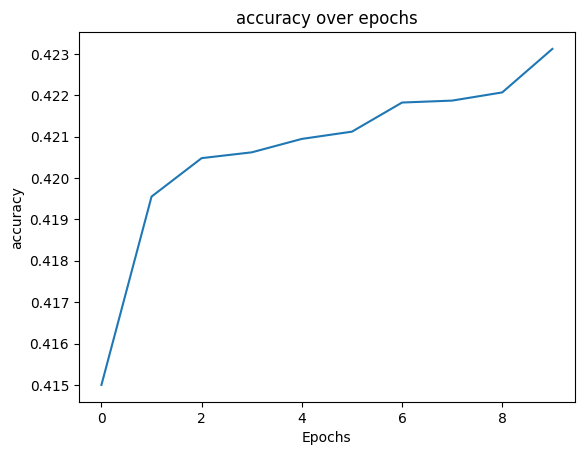

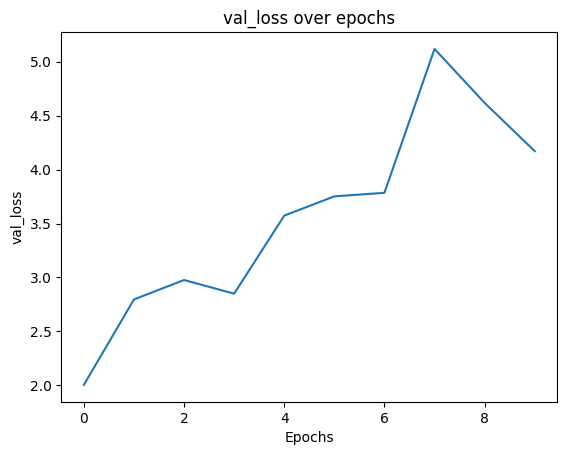

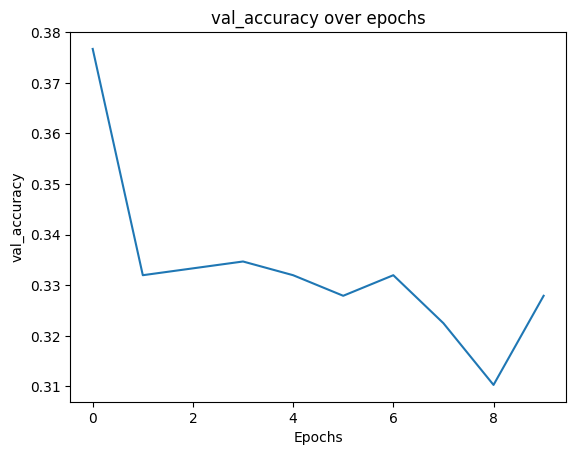

In [ ]:
model = Sequential()

# model.add(Dense(128, activation='relu', input_shape=(X_train_scaled.shape[1],)))
# model.add(BatchNormalization())
# model.add(Dropout(0.1))

model.add(Dense(32, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.1))

model.add(Dense(y_train_categorical.shape[1], activation='softmax'))

# Compile the model
model.compile(metrics=['accuracy'], loss='categorical_crossentropy', optimizer='adam')

# Ensure that y_train_categorical and y_test_categorical are numpy arrays
y_train_categorical = to_categorical(y_train)
y_test_categorical = to_categorical(y_test)

# Convert y_train to a Tensor
y_train_tensor = tf.convert_to_tensor(y_train_categorical)

# Train the model
history = model.fit(X_train, y_train_tensor, validation_data=(X_test, y_test_categorical), batch_size=16, epochs=10) #steps_per_epoch=2195

for j in list(history.history.keys()):
    plt.plot(history.history[j])
    plt.title(j + ' over epochs')
    plt.ylabel(j)
    plt.xlabel('Epochs')
    plt.show()